In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:

# Load data
train = pd.read_csv('/Users/nipace/Documents/semo/ml/ml-assignment-8/MLPB/Problems/Classify Dart Throwers/_Data/train.csv')
test = pd.read_csv('/Users/nipace/Documents/semo/ml/ml-assignment-8/MLPB/Problems/Classify Dart Throwers/_Data/test.csv')

In [4]:
train.head()


,ID,XCoord,YCoord,Competitor
0,111,0.943354,-0.184819,Bob
1,92,0.121557,-0.927656,Bob
2,20,0.818485,0.375437,Bob
3,75,0.867462,-0.159851,Sue
4,10,-0.817321,-0.373419,Kate


In [5]:
test.head()

,ID,XCoord,YCoord,Competitor
0,6,0.064729,0.356983,Mark
1,12,-0.766731,-0.255876,Sue
2,22,0.182282,-0.540976,Mark
3,34,-0.908910,0.223945,Bob
4,47,0.992230,-0.085550,Bob


In [10]:
# Fix column types
train['Competitor'] = train['Competitor'].astype('category')
test['Competitor'] = test['Competitor'].astype('category')
#This is done to convert competitor to a categorical type because it have limited possible values and if we convert them to categorical data
# it will take less memmory and give better performance

In [11]:
# Add feature DistFromCenter
train['DistFromCenter'] = np.sqrt(train['XCoord']**2 + train['YCoord']**2)
test['DistFromCenter'] = np.sqrt(test['XCoord']**2 + test['YCoord']**2)
# Calculate distance from center using Distance = sqrt(x^2 + y^2)


In [12]:
train.head()

,ID,XCoord,YCoord,Competitor,DistFromCenter
0,111,0.943354,-0.184819,Bob,0.961288
1,92,0.121557,-0.927656,Bob,0.935586
2,20,0.818485,0.375437,Bob,0.900483
3,75,0.867462,-0.159851,Sue,0.882067
4,10,-0.817321,-0.373419,Kate,0.898585


In [13]:
# Build folds for cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2016)
train['FoldID'] = -1
for fold_id, (_, val_idx) in enumerate(kf.split(train, train['Competitor'])):
    train.loc[val_idx, 'FoldID'] = fold_id

In [14]:
train.head()

,ID,XCoord,YCoord,Competitor,DistFromCenter,FoldID
0,111,0.943354,-0.184819,Bob,0.961288,0
1,92,0.121557,-0.927656,Bob,0.935586,4
2,20,0.818485,0.375437,Bob,0.900483,4
3,75,0.867462,-0.159851,Sue,0.882067,1
4,10,-0.817321,-0.373419,Kate,0.898585,3


k=1, Mean Accuracy: 0.6867
k=2, Mean Accuracy: 0.6267
k=3, Mean Accuracy: 0.6067
k=4, Mean Accuracy: 0.5667
k=5, Mean Accuracy: 0.4667
k=6, Mean Accuracy: 0.5200
k=7, Mean Accuracy: 0.4667
k=8, Mean Accuracy: 0.4667
k=9, Mean Accuracy: 0.4733
k=10, Mean Accuracy: 0.4400
k=11, Mean Accuracy: 0.4800
k=12, Mean Accuracy: 0.4733
k=13, Mean Accuracy: 0.4733
k=14, Mean Accuracy: 0.4800
k=15, Mean Accuracy: 0.4733
k=16, Mean Accuracy: 0.4800
k=17, Mean Accuracy: 0.4667
k=18, Mean Accuracy: 0.4467
k=19, Mean Accuracy: 0.4600
k=20, Mean Accuracy: 0.4467
k=21, Mean Accuracy: 0.4133
k=22, Mean Accuracy: 0.3600
k=23, Mean Accuracy: 0.3600
k=24, Mean Accuracy: 0.3733
k=25, Mean Accuracy: 0.3600
k=26, Mean Accuracy: 0.3200
k=27, Mean Accuracy: 0.3200
k=28, Mean Accuracy: 0.3133
k=29, Mean Accuracy: 0.3267
k=30, Mean Accuracy: 0.3267
Best K for KNN: 1, Best Score: 0.6867
Best SVM Params: {'C': 100, 'kernel': 'rbf'}, Best Score: 0.7333


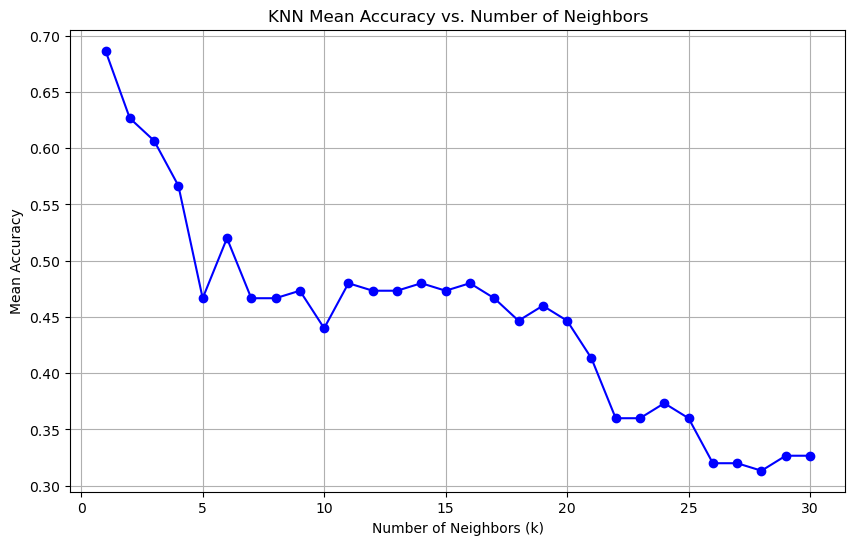

In [21]:
# KNN
knn_features = ['XCoord', 'YCoord']
knn_best_score = 0
knn_best_k = 0
knn_scores = []
for k in range(1, 31):
    scores = []
    for fold_id in range(5):
        train_fold = train[train['FoldID'] != fold_id]
        val_fold = train[train['FoldID'] == fold_id]
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_fold[knn_features], train_fold['Competitor'])
        preds = knn.predict(val_fold[knn_features])
        scores.append(accuracy_score(val_fold['Competitor'], preds))
    
    mean_score = np.mean(scores)
    knn_scores.append(mean_score)
    print(f"k={k}, Mean Accuracy: {mean_score:.4f}")
    if mean_score > knn_best_score:
        knn_best_score = mean_score
        knn_best_k = k

print(f"Best K for KNN: {knn_best_k}, Best Score: {knn_best_score:.4f}")
print(f"Best SVM Params: {svm_best_params}, Best Score: {svm_best_score:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), knn_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.title('KNN Mean Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

In [18]:
# SVM
svm_features = ['XCoord', 'YCoord', 'DistFromCenter']
svm_best_score = 0
svm_best_params = {}
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
for C in param_grid['C']:
    for kernel in param_grid['kernel']:
        scores = []
        for fold_id in range(5):
            train_fold = train[train['FoldID'] != fold_id]
            val_fold = train[train['FoldID'] == fold_id]
            
            svm = SVC(C=C, kernel=kernel, probability=True, random_state=2016)
            svm.fit(train_fold[svm_features], train_fold['Competitor'])
            preds = svm.predict(val_fold[svm_features])
            scores.append(accuracy_score(val_fold['Competitor'], preds))
        
        mean_score = np.mean(scores)
        print(f"C={C}, Kernel={kernel}, Mean Accuracy: {mean_score:.4f}")
        if mean_score > svm_best_score:
            svm_best_score = mean_score
            svm_best_params = {'C': C, 'kernel': kernel}



C=0.01, Kernel=linear, Mean Accuracy: 0.3000
C=0.01, Kernel=poly, Mean Accuracy: 0.2867
C=0.01, Kernel=rbf, Mean Accuracy: 0.3467
C=0.01, Kernel=sigmoid, Mean Accuracy: 0.2733
C=0.1, Kernel=linear, Mean Accuracy: 0.3000
C=0.1, Kernel=poly, Mean Accuracy: 0.5200
C=0.1, Kernel=rbf, Mean Accuracy: 0.3600
C=0.1, Kernel=sigmoid, Mean Accuracy: 0.2733
C=1, Kernel=linear, Mean Accuracy: 0.4800
C=1, Kernel=poly, Mean Accuracy: 0.6467
C=1, Kernel=rbf, Mean Accuracy: 0.5533
C=1, Kernel=sigmoid, Mean Accuracy: 0.3533
C=10, Kernel=linear, Mean Accuracy: 0.6667
C=10, Kernel=poly, Mean Accuracy: 0.6733
C=10, Kernel=rbf, Mean Accuracy: 0.7267
C=10, Kernel=sigmoid, Mean Accuracy: 0.3133
C=100, Kernel=linear, Mean Accuracy: 0.7000
C=100, Kernel=poly, Mean Accuracy: 0.6800
C=100, Kernel=rbf, Mean Accuracy: 0.7333
C=100, Kernel=sigmoid, Mean Accuracy: 0.3267
C=1000, Kernel=linear, Mean Accuracy: 0.7067
C=1000, Kernel=poly, Mean Accuracy: 0.6933
C=1000, Kernel=rbf, Mean Accuracy: 0.7067
C=1000, Kernel=sig

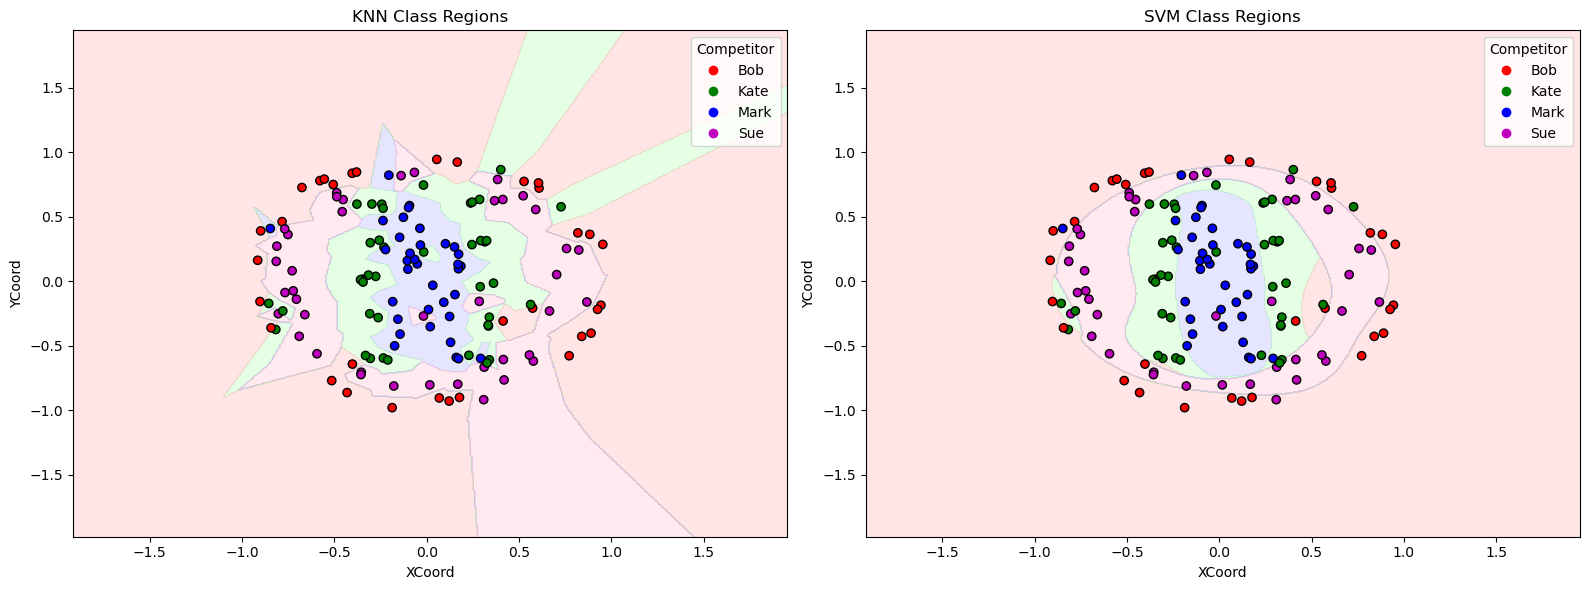

In [26]:
from matplotlib.colors import ListedColormap

X_knn = train[knn_features].values
y_knn = train['Competitor'].cat.codes  
X_svm = train[svm_features].values
y_svm = train['Competitor'].cat.codes  

# Retraining KNN model with the best found hyperparameter
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_knn, y_knn)

# Retraining SVM model with the best found hyperparameters
svm = SVC(C=100, kernel='rbf', probability=True, random_state=2016)
svm.fit(X_svm, y_svm)

# Create a mesh grid for plotting
x_min, x_max = train['XCoord'].min() - 1, train['XCoord'].max() + 1
y_min, y_max = train['YCoord'].min() - 1, train['YCoord'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict on mesh grid for KNN
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Compute DistFromCenter for the mesh grid
dist_from_center = np.sqrt(xx.ravel()**2 + yy.ravel()**2)

# Stack features to match the trained model's input
X_mesh = np.c_[xx.ravel(), yy.ravel(), dist_from_center]
# Predict on mesh grid for SVM 
Z_svm = svm.predict(X_mesh).reshape(xx.shape)

# Plotting decision regions
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFC0CB'])
cmap_bold = ['r', 'g', 'b', 'm']

# KNN plot
ax[0].contourf(xx, yy, Z_knn, alpha=0.3, cmap=cmap_light)
scatter = ax[0].scatter(train['XCoord'], train['YCoord'], c=y_knn, edgecolor='k', cmap=ListedColormap(cmap_bold))
ax[0].set_title('KNN Class Regions')
ax[0].set_xlabel('XCoord')
ax[0].set_ylabel('YCoord')

# SVM plot
ax[1].contourf(xx, yy, Z_svm, alpha=0.3, cmap=cmap_light)
ax[1].scatter(train['XCoord'], train['YCoord'], c=y_svm, edgecolor='k', cmap=ListedColormap(cmap_bold))
ax[1].set_title('SVM Class Regions')
ax[1].set_xlabel('XCoord')
ax[1].set_ylabel('YCoord')

# Adding legends for competitors
legend_labels = train['Competitor'].cat.categories
handles, _ = scatter.legend_elements()
ax[0].legend(handles, legend_labels, title="Competitor")
ax[1].legend(handles, legend_labels, title="Competitor")

plt.tight_layout()
plt.show()

In [30]:
# Ensemble (KNN, SVM) using Logistic Regression
knn = KNeighborsClassifier(n_neighbors=knn_best_k)
knn.fit(train[knn_features], train['Competitor'])
train['Meta.knn'] = knn.predict(train[knn_features])
test['Meta.knn'] = knn.predict(test[knn_features])

svm = SVC(C=svm_best_params['C'], kernel=svm_best_params['kernel'], probability=True, random_state=2016)
svm.fit(train[svm_features], train['Competitor'])
train['Meta.svm'] = svm.predict(train[svm_features])
test['Meta.svm'] = svm.predict(test[svm_features])
print(train.head())

# One-hot encode predictions
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
train_meta = encoder.fit_transform(train[['Meta.knn', 'Meta.svm']])
test_meta = encoder.transform(test[['Meta.knn', 'Meta.svm']])

# Logistic Regression
lr_features = np.hstack((train_meta, train[svm_features]))
test_lr_features = np.hstack((test_meta, test[svm_features]))
lr = LogisticRegression()
lr.fit(lr_features, train['Competitor'])
test['Pred.ensemble'] = lr.predict(test_lr_features)

# Results
knn_accuracy = accuracy_score(test['Competitor'], test['Meta.knn'])
svm_accuracy = accuracy_score(test['Competitor'], test['Meta.svm'])
ensemble_accuracy = accuracy_score(test['Competitor'], test['Pred.ensemble'])
print(f"KNN Accuracy: {knn_accuracy:.4f}, SVM Accuracy: {svm_accuracy:.4f}, Ensemble Accuracy: {ensemble_accuracy:.4f}")

    ID    XCoord    YCoord Competitor  DistFromCenter  FoldID Meta.knn  \
0  111  0.943354 -0.184819        Bob        0.961288       0      Bob   
1   92  0.121557 -0.927656        Bob        0.935586       4      Bob   
2   20  0.818485  0.375437        Bob        0.900483       4      Bob   
3   75  0.867462 -0.159851        Sue        0.882067       1      Sue   
4   10 -0.817321 -0.373419       Kate        0.898585       3     Kate   

  Meta.svm  
0      Bob  
1      Bob  
2      Bob  
3      Sue  
4      Bob  
KNN Accuracy: 0.7027, SVM Accuracy: 0.8649, Ensemble Accuracy: 0.7027
